In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
#little noise
import json

rrwn_res = json.load(open('../data/graph_match_rrwm_1.json'))
sm_res = json.load(open('../data/graph_match_sm_1.json'))
ipfp_res = json.load(open('../data/graph_match_ipfp_1.json'))


In [6]:
from typing import Dict


def extract_metric(result: Dict, metric: str):
    assert metric in ['accuracy', 'precision', 'recall']
    metrics = []
    for _, ego_preds in result.items():
        for _, preds in ego_preds.items():
            metrics.extend([pred[metric] for pred in preds])
    return metrics

# extract_metric(auction_result,'precision')

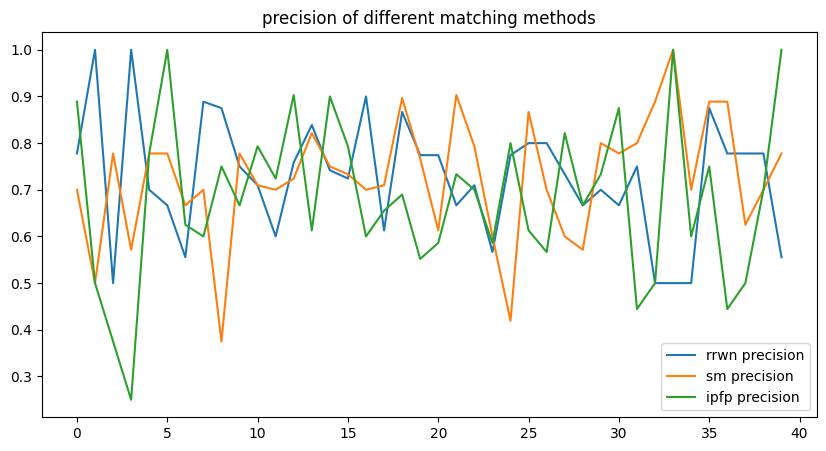

In [8]:
def plot_metric(metric: str, title: str, results: list):
    assert metric in ['accuracy', 'precision', 'recall']
    assert len(results) == 3
    rrwn_res, sm_res, ipfp_res = results
    rrwn_metric = extract_metric(rrwn_res, metric)
    sm_metric = extract_metric(sm_res, metric)
    ipfp_metric = extract_metric(ipfp_res, metric)
    plt.figure(figsize=(10, 5))
    plt.plot(rrwn_metric, label=f'rrwn {metric}')
    plt.plot(sm_metric, label=f'sm {metric}')
    plt.plot(ipfp_metric, label=f'ipfp {metric}')
    plt.title(title)
    plt.legend()
    plt.show()


plot_metric('precision', 'precision of different matching methods', [rrwn_res, sm_res, ipfp_res])

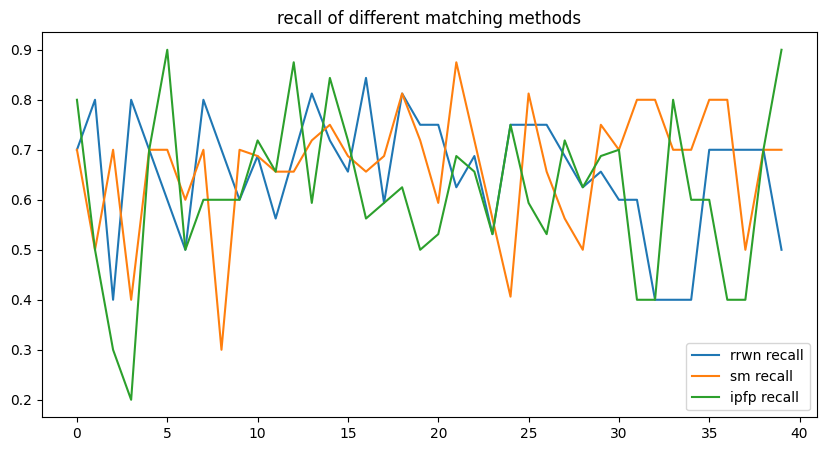

In [9]:
plot_metric('recall', 'recall of different matching methods', [rrwn_res, sm_res, ipfp_res])

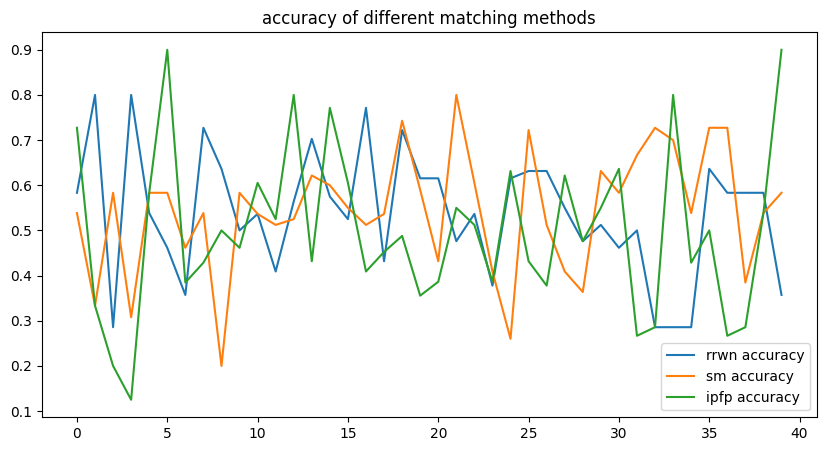

In [10]:
plot_metric('accuracy', 'accuracy of different matching methods', [rrwn_res, sm_res, ipfp_res])

In [11]:
def extract_mean_and_std(result: Dict, metric: str):
    assert metric in ['accuracy', 'precision', 'recall']
    metrics = []
    for _, ego_preds in result.items():
        for _, preds in ego_preds.items():
            metrics.append([pred[metric] for pred in preds])
    return np.mean(metrics), np.std(metrics)


def extract_metrics_dict(result: Dict):
    metrics_dict = {}
    for metric in ['accuracy', 'precision', 'recall']:
        metrics_dict[metric] = extract_mean_and_std(result, metric)
    return pd.DataFrame(metrics_dict, index=['mean', 'std'])


In [12]:
import pandas as pd

results = [rrwn_res, sm_res, ipfp_res]
results_dict = map(extract_metrics_dict, results)
results_df = pd.concat(results_dict, axis=1, keys=['rrwn', 'sm', 'ipfp'])
results_df

rrwn                           sm                          ipfp  \
      accuracy precision    recall accuracy precision    recall  accuracy   
mean  0.538205  0.727817  0.655937  0.54403   0.72624  0.666719  0.497983   
std   0.136980  0.127212  0.118906  0.13468   0.12821  0.120541  0.178782   

                          
     precision    recall  
mean  0.681925  0.615000  
std   0.168820  0.154874

In [18]:
results_df.columns

MultiIndex([('rrwn',  'accuracy'),
            ('rrwn', 'precision'),
            ('rrwn',    'recall'),
            (  'sm',  'accuracy'),
            (  'sm', 'precision'),
            (  'sm',    'recall'),
            ('ipfp',  'accuracy'),
            ('ipfp', 'precision'),
            ('ipfp',    'recall')],
           )

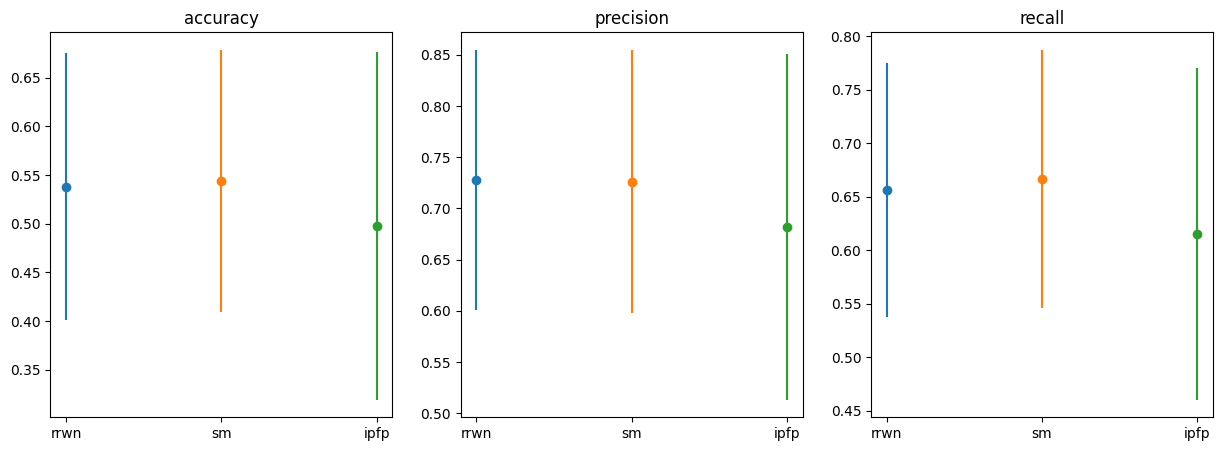

In [19]:


def plot_metrics(results_df):
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    methods=['rrwn', 'sm', 'ipfp']
    metrics = ['accuracy', 'precision', 'recall']
    for i, metric in enumerate(metrics):
        for method in methods:
            mean = results_df[method][metric]['mean']
            std = results_df[method][metric]['std']
            ax[i].errorbar(method, mean, std, fmt='o')
        ax[i].set_title(metric)
plot_metrics(results_df)